In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 43.6MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.0MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [13]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 107ms/step - loss: 1.3910 - accuracy: 0.5914 - val_loss: 0.7481 - val_accuracy: 0.6680
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5756 - accuracy: 0.7036 - val_loss: 0.5130 - val_accuracy: 0.7612
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4836 - accuracy: 0.7638 - val_loss: 0.4531 - val_accuracy: 0.7844
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4261 - accuracy: 0.8030 - val_loss: 0.5160 - val_accuracy: 0.7568
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3601 - accuracy: 0.8387 - val_loss: 0.6925 - val_accuracy: 0.6504
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2993 - accuracy: 0.8705 - val_loss: 0.4999 - val_accuracy: 0.8068
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2408 - accuracy: 0.9019 - val_loss: 0.6057 - val_ac

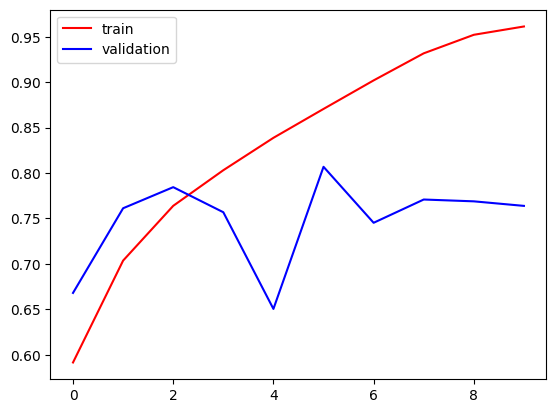

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

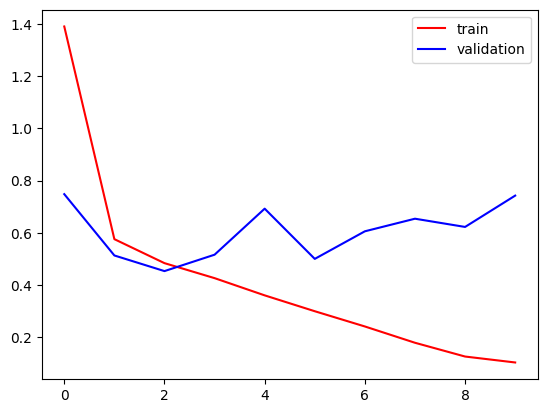

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [44]:
import cv2

In [62]:
test_img = cv2.imread('/content/download.jpg')

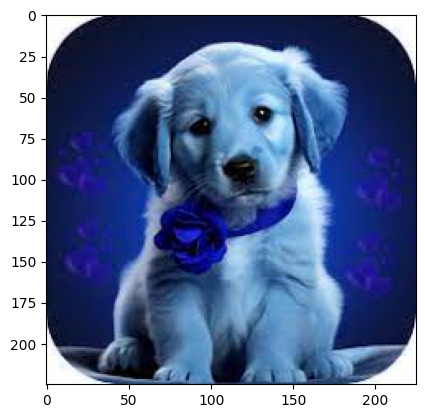

In [63]:
plt.imshow(test_img)

In [64]:
test_img.shape


(225, 225, 3)

In [67]:
test_img = cv2.resize(test_img,(256,256))

In [68]:
test_input = test_img.reshape((1,256,256,3))

In [69]:
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[1.]], dtype=float32)

In [70]:
test_img = cv2.imread('/content/cat.jpg')

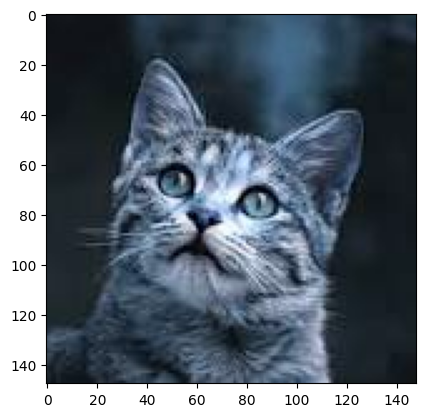

In [71]:
plt.imshow(test_img)

In [72]:
test_img = cv2.resize(test_img,(256,256))

In [73]:
test_input = test_img.reshape((1,256,256,3))

In [74]:
model.predict(test_input)

1/1 [==============================] - 0s 32ms/step


array([[0.]], dtype=float32)